In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
sns.set(style="darkgrid")

In [ ]:
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(200, 4)

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


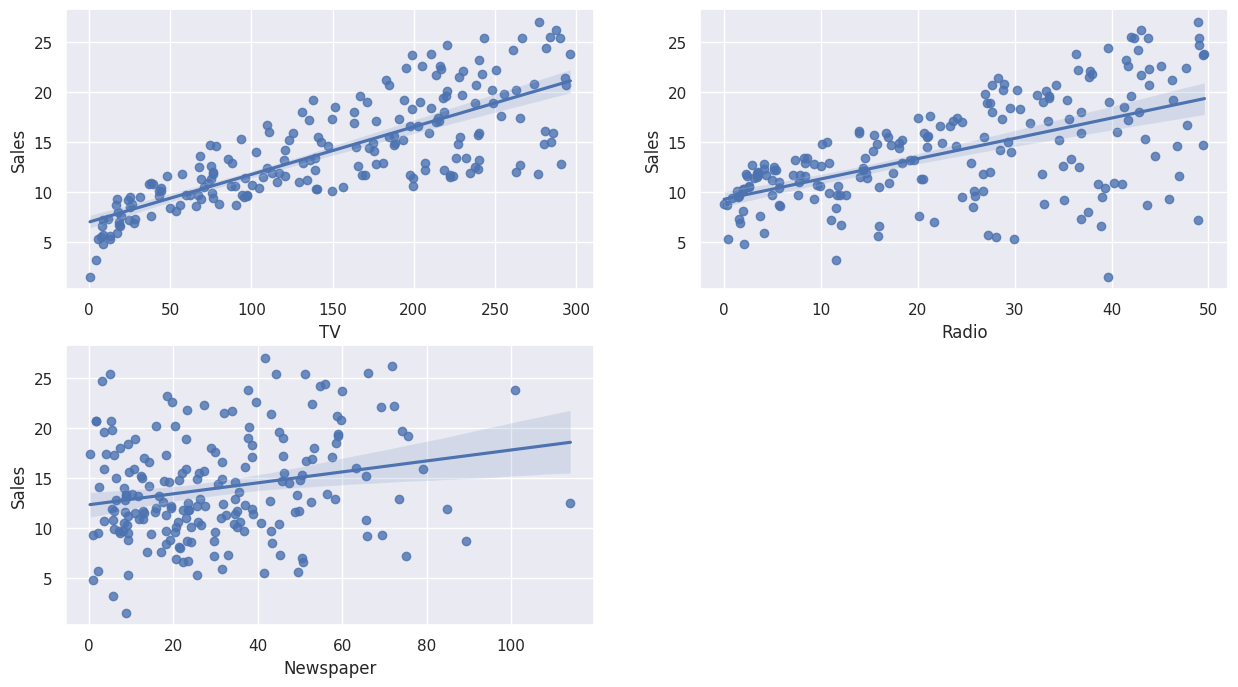

In [ ]:
plt.figure(figsize=(15,8))
for i,col in enumerate(['TV','Radio','Newspaper']):
    plt.subplot(2,2,i+1)
    sns.regplot(data=data, x=col, y='Sales')

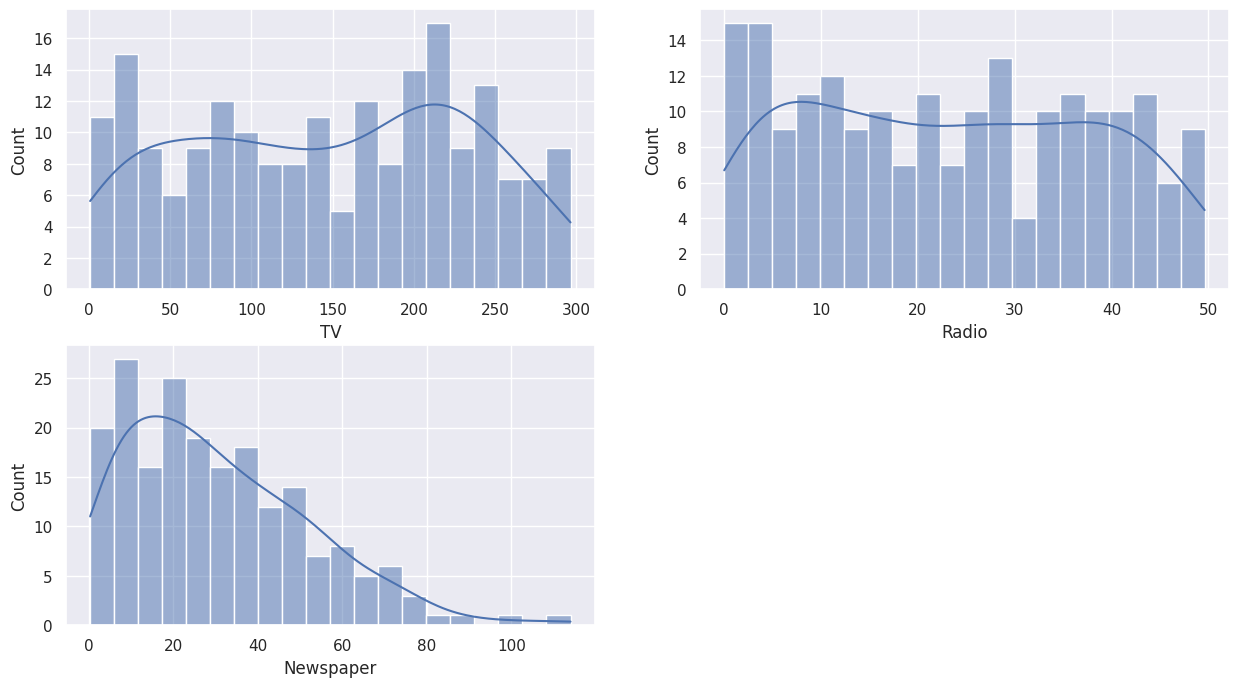

In [ ]:
plt.figure(figsize=(15,8))
for i,col in enumerate(['TV','Radio','Newspaper']):
    plt.subplot(2,2,i+1)
    sns.histplot(data=data,x=col,bins=20,kde=True)

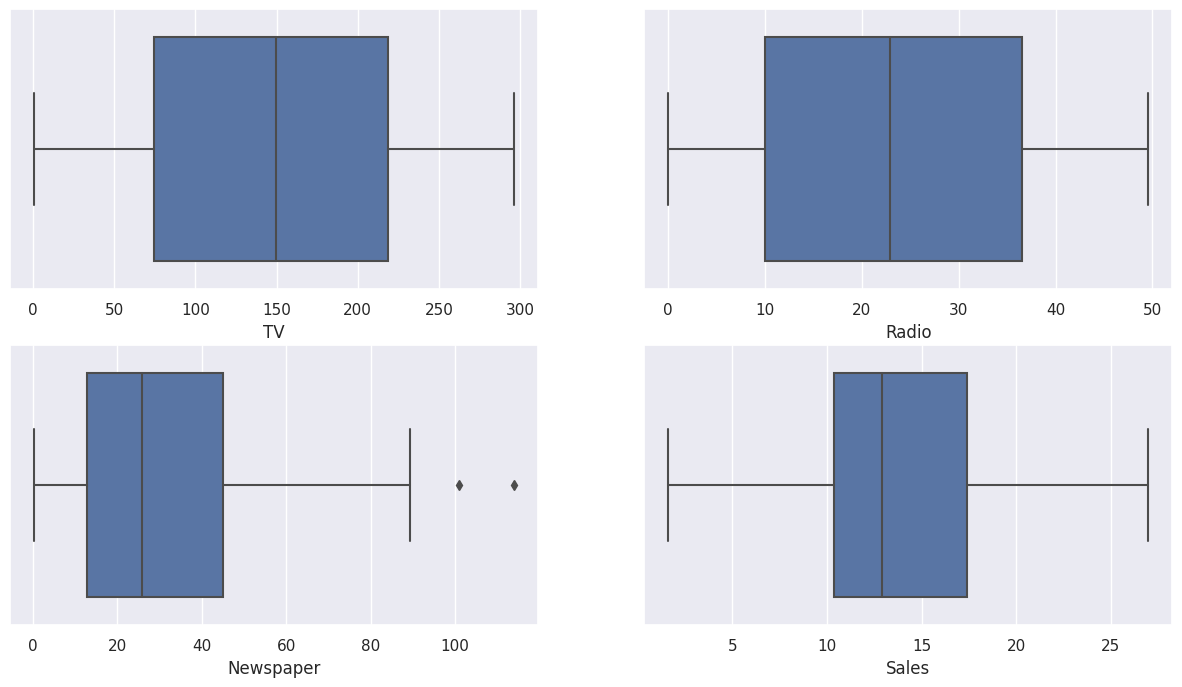

In [ ]:
plt.figure(figsize=(15,8))
for i,col in enumerate(['TV','Radio','Newspaper','Sales']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data, x=col, orient='h')


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

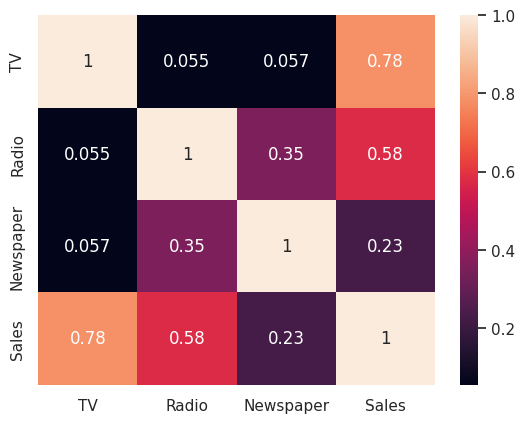

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data['Total_advertising']=data['TV']+data['Radio']+data['Newspaper']
data.head()

,TV,Radio,Newspaper,Sales,Total_advertising
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales,Total_advertising
TV,1.000000,0.054809,0.056648,0.782224,0.945330
Radio,0.054809,1.000000,0.354104,0.576223,0.293211
Newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
Sales,0.782224,0.576223,0.228299,1.000000,0.867712
Total_advertising,0.945330,0.293211,0.343059,0.867712,1.000000


In [ ]:
X=(data.drop(columns=['Sales'])).values
Y=data[['Sales']].values.flatten()
X[:5,], Y[:5]

(array([[230.1,  37.8,  69.2, 337.1],
        [ 44.5,  39.3,  45.1, 128.9],
        [ 17.2,  45.9,  69.3, 132.4],
        [151.5,  41.3,  58.5, 251.3],
        [180.8,  10.8,  58.4, 250. ]]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
x_train.shape, x_test.shape

((150, 4), (50, 4))

In [ ]:
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)
x_train_scale[:5,]

array([[-0.8814297 ,  1.56851374,  0.19562328, -0.52230687],
       [ 0.18206797, -1.10371242, -0.8546056 , -0.2050451 ],
       [-1.70086527,  1.70986576,  2.15572787, -0.81863817],
       [-1.71147667,  1.03676093,  0.97482535, -1.20750415],
       [-0.9026525 , -1.52776846, -0.75781031, -1.26588913]])

In [ ]:
lin_model=LinearRegression()
lin_model.fit(x_train_scale, y_train)

y_train_pred=lin_model.predict(x_train_scale)
y_test_pred=lin_model.predict(x_test_scale)

mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)

print('Linear Regression Evaluation =>\n\tTrain:\n\t\tMSE: {}\n\t\tR2 Score: {}\n\tTest:\n\t\tMSE: {}\n\t\tR2 Score: {}'.format(mse_train, r2_train,mse_test,r2_test))

Linear Regression Evaluation =>
	Train:
		MSE: 2.767891078046973
		R2 Score: 0.8966445527601498
	Test:
		MSE: 4.226354882982705
		R2 Score: 0.8437381729053244


In [ ]:
rfr_model=RandomForestRegressor(random_state=42)
rfr_model.fit(x_train_scale, y_train)

y_train_pred=rfr_model.predict(x_train_scale)
y_test_pred=rfr_model.predict(x_test_scale)

mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)

print('Random Forest Regressor Evaluation =>\n\tTrain:\n\t\tMSE: {}\n\t\tR2 Score: {}\n\tTest:\n\t\tMSE: {}\n\t\tR2 Score: {}'.format(mse_train, r2_train,mse_test,r2_test))

Random Forest Regressor Evaluation =>
	Train:
		MSE: 0.12093396000000022
		R2 Score: 0.9954842213187429
	Test:
		MSE: 2.9830765000000015
		R2 Score: 0.8897061422527262


In [ ]:
gbr_model=GradientBoostingRegressor(random_state=42,loss='squared_error')
gbr_model.fit(x_train_scale, y_train)

y_train_pred=gbr_model.predict(x_train_scale)
y_test_pred=gbr_model.predict(x_test_scale)

mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)

print('Gradient Boosting Regressor Evaluation =>\n\tTrain:\n\t\tMSE: {}\n\t\tR2 Score: {}\n\tTest:\n\t\tMSE: {}\n\t\tR2 Score: {}'.format(mse_train, r2_train,mse_test,r2_test))

Gradient Boosting Regressor Evaluation =>
	Train:
		MSE: 0.028774279874588686
		R2 Score: 0.9989255434980696
	Test:
		MSE: 2.9077225021685313
		R2 Score: 0.8924922200209338


Text(0, 0.5, 'Predicted Test Values')

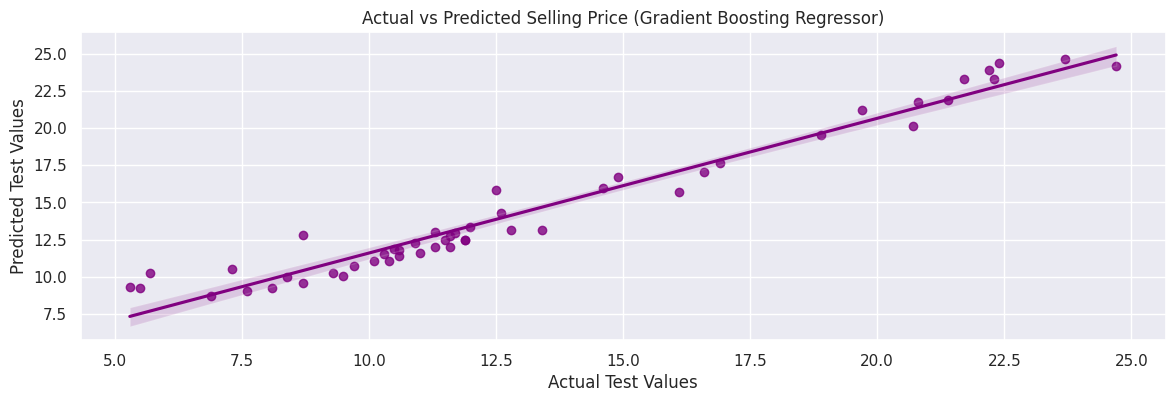

In [ ]:
plt.figure(figsize=(14,4))
sns.regplot(x=y_test,y=y_test_pred,color='purple')
plt.title('Actual vs Predicted Selling Price (Gradient Boosting Regressor)')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')